<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Fast Food Chains and Price Discrimination

_Authors: Kiefer Katovich (SF), Mario Carrillo (SF)_

---

This group lab uses a 1994 dataset that has detailed prices on items sold at over 400 Burger King, Wendy's, KFC and [Roy Roger](https://en.wikipedia.org/wiki/Roy_Rogers_Restaurants) restaurants in New Jersey and Pennsivania.

It is a restricted version of the dataset used in this publication:

> [K. Graddy (1997), "Do Fast-Food Chains Price Discriminate on the Race and Income Characteristics of an Area?" Journal of Business and Economic Statistics 15, 391-401.](http://people.brandeis.edu/~kgraddy/published%20papers/GraddyK_jbes1997.pdf)

**The goal of this this exercise is to evaluate whether fast-food restaurants are using discriminatory pricing.** This is a fairly open ended prompt and it up to you how you want to quantify pricing discrimination. There are two immediate groups of variables that can help you investigate this:
- You have the prices of items, which can be a metric of discriminatory practices (charging higher prices).
- You have proportion of African Americans, proportion of low income, and proportion of residents without a car.

---

### In groups, you should:
1. **Load the data and examine it.**
2. **Perform any required data cleaning.**
3. **Conduct EDA relevant to the goals of the project.** What variables are you interested in for your target(s) and predictors? What kinds of relationships to you see in the data that will inform your analysis?
4. **Formulate your hypotheses and formally define them.** Come up with a plan, based on the prompt and your EDA, for testing your hypotheses.
5. **Construct regression models to test your hypotheses.** What do you find? Do you accept or reject your hypothesis? What are the limitations and assumptions of your approach? 
6. **[Bonus] Cross-validate the results of your regression.** If you achieved positive results, do these hold up during cross-validation or train/test split?
7. **Prepare a brief (10 minute) presentation on the findings.** Your group will present on the questions you asked, models you built, and findings.
    - Be concise! Only present information that is relevant.
    - Visuals are nice but don't overdo it.
    - Don't just talk about the significance or metrics in your model. Interpret the coefficients. What are the implications?
    - What future directions would you go in from here?


> *Note*: If you are interested, the full dataset is also in the datasets folder under the name `discrim_full.csv`.

### Dataset characteristics

    :Number of Instances: 410
    
    :Attribute Information
    
    psoda         price of medium soda
    pfries        price of small fries
    pentree       price entree (burger or chicken)
    wagest        starting wage
    nmgrs         number of managers
    nregs         number of registers
    hrsopen       hours open
    emp           number of employees
    compown       =1 if company owned
    chain         BK = 1, KFC = 2, Roy Rogers = 3, Wendy's = 4
    density       population density, town
    crmrte        crime rate, town
    state         NJ = 1, PA = 2
    prpblck       proportion black, zipcode
    prppov        proportion in poverty, zipcode
    prpncar       proportion no car, zipcode
    hseval        median housing value, zipcode
    nstores       number of stores, zipcode
    income        median family income, zipcode
    county        county label
    NJ            =1 for New Jersey
    BK            =1 if Burger King
    KFC           =1 if Kentucky Fried Chicken
    RR            =1 if Roy Rogers

In [1]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import r2_score

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
df = pd.read_csv('./datasets/discrim.csv')

In [3]:
df.head()

,psoda,pfries,pentree,wagest,nmgrs,nregs,hrsopen,emp,compown,chain,...,prppov,prpncar,hseval,nstores,income,county,NJ,BK,KFC,RR
0,1.12,1.06,1.02,4.25,3.0,5.0,16.0,27.5,1,3,...,0.036579,0.078843,148300.0,3,44534.0,18,1,0,0,1
1,1.06,0.91,0.95,4.75,3.0,3.0,16.5,21.5,0,1,...,0.036579,0.078843,148300.0,3,44534.0,18,1,1,0,0
2,1.06,0.91,0.98,4.25,3.0,5.0,18.0,30.0,0,1,...,0.087907,0.269430,169200.0,3,41164.0,12,1,1,0,0
3,1.12,1.02,1.06,5.00,4.0,5.0,16.0,27.5,0,3,...,0.059123,0.136690,171600.0,3,50366.0,10,1,0,0,1
4,1.12,NaN,0.49,5.00,3.0,3.0,16.0,5.0,0,1,...,0.025414,0.073802,249100.0,1,72287.0,10,1,1,0,0


In [4]:
df.describe()

,psoda,pfries,pentree,wagest,nmgrs,nregs,hrsopen,emp,compown,chain,...,prppov,prpncar,hseval,nstores,income,county,NJ,BK,KFC,RR
count,402.000000,393.000000,398.000000,390.000000,404.000000,388.000000,410.000000,404.000000,410.000000,410.000000,...,409.000000,409.000000,409.000000,410.000000,409.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,1.044876,0.921985,1.322186,4.615641,3.420297,3.608247,14.439024,17.621906,0.343902,2.117073,...,0.071297,0.114874,147399.266504,3.139024,47053.784841,13.658537,0.807317,0.417073,0.195122,0.241463
std,0.088687,0.105881,0.643085,0.347015,1.018408,1.243540,2.809987,9.423264,0.475589,1.110497,...,0.067439,0.117416,56070.467520,1.809426,13179.286069,8.045439,0.394888,0.493678,0.396779,0.428493
min,0.730000,0.670000,0.490000,4.250000,1.000000,1.000000,7.000000,3.000000,0.000000,1.000000,...,0.004298,0.000000,33900.000000,1.000000,15919.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.980000,0.850000,0.950000,4.250000,3.000000,3.000000,12.000000,11.375000,0.000000,1.000000,...,0.029710,0.043531,107900.000000,2.000000,37883.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1.060000,0.930000,1.020000,4.500000,3.000000,3.000000,15.500000,16.375000,0.000000,2.000000,...,0.044441,0.073892,142300.000000,3.000000,46272.000000,14.000000,1.000000,0.000000,0.000000,0.000000
75%,1.085000,1.000000,1.470000,4.950000,4.000000,4.000000,16.000000,21.000000,1.000000,3.000000,...,0.082159,0.123482,176800.000000,4.000000,54981.000000,20.000000,1.000000,1.000000,0.000000,0.000000
max,1.490000,1.270000,3.950000,5.750000,10.000000,8.000000,24.000000,80.000000,1.000000,4.000000,...,0.418480,0.627238,473400.000000,8.000000,136529.000000,29.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 24 columns):
psoda      410 non-null float64
pfries     410 non-null float64
pentree    410 non-null float64
wagest     410 non-null float64
nmgrs      410 non-null float64
nregs      410 non-null float64
hrsopen    410 non-null float64
emp        410 non-null float64
compown    410 non-null int64
chain      410 non-null int64
density    410 non-null float64
crmrte     410 non-null float64
state      410 non-null int64
prpblck    410 non-null float64
prppov     410 non-null float64
prpncar    410 non-null float64
hseval     410 non-null float64
nstores    410 non-null int64
income     410 non-null float64
county     410 non-null int64
NJ         410 non-null int64
BK         410 non-null int64
KFC        410 non-null int64
RR         410 non-null int64
dtypes: float64(15), int64(9)
memory usage: 76.9 KB


In [12]:
df.fillna(0.0, inplace=True)

In [35]:
soda = df.groupby(['psoda', 'prpblck'])
fries = df.groupby(['pfries', 'prpblck'])
entree = df.groupby(['pentree', 'prpblck'])

In [57]:
soda_mean = df['psoda'].mean()
fries_mean = df['pfries'].mean()
entree_mean = df['pentree'].mean()

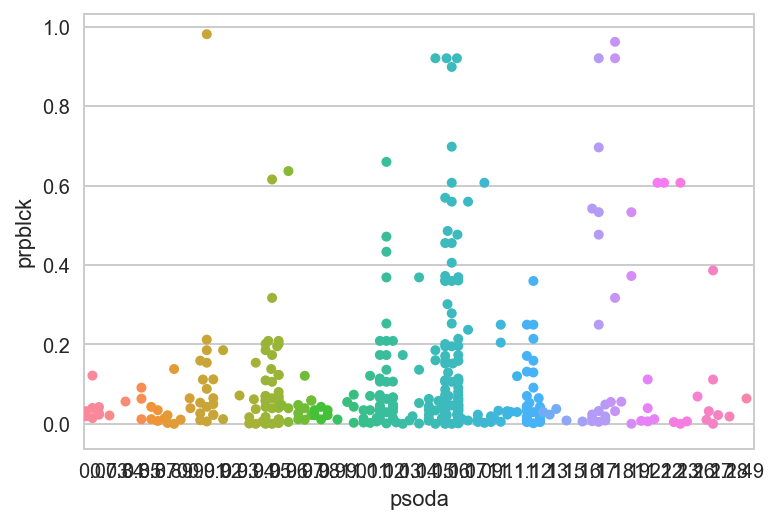

In [51]:
import seaborn as sns
sns.swarmplot(x=df.psoda, y=df.prpblck)